# Predicting and Comparing House Prices in Istanbul and London

This project compares house pricing patterns in **Istanbul** and **London** using publicly available datasets.
The key steps and goals include:

- Standardizing and cleaning data from two cities
- Performing exploratory data analysis (EDA)
- Applying regression models to predict house prices
- Comparing feature importances such as `squareMeters` and `bathrooms`
- Evaluating model performances with various metrics (R², MAE, RMSE, MAPE, etc.)
- Visualizing prediction accuracy and residual errors

The project aims to investigate **how square meter and bathroom count affect house prices in each city**, and how well machine learning models can predict prices based on those features.


In [1]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_london_df=pd.read_csv("/Users/yemre/Desktop/2.2/dsa210/Dsa proje/data/kaggle_london_house_price_data.csv")

In [3]:
raw_ist_df=pd.read_csv("/Users/yemre/Desktop/2.2/dsa210/Dsa proje/data/HouseData_ist.csv")

In [4]:
raw_london_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418201 entries, 0 to 418200
Data columns (total 28 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   fullAddress                                418201 non-null  object 
 1   postcode                                   418201 non-null  object 
 2   country                                    418201 non-null  object 
 3   outcode                                    418201 non-null  object 
 4   latitude                                   418201 non-null  float64
 5   longitude                                  418201 non-null  float64
 6   bathrooms                                  340270 non-null  float64
 7   bedrooms                                   377665 non-null  float64
 8   floorAreaSqM                               392991 non-null  float64
 9   livingRooms                                357701 non-null  float64
 10  tenure  

In [5]:
raw_london_df.describe()


,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,rentEstimate_lowerPrice,rentEstimate_currentPrice,rentEstimate_upperPrice,saleEstimate_lowerPrice,saleEstimate_currentPrice,saleEstimate_upperPrice,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,history_price,history_percentageChange,history_numericChange
count,418201.000000,418201.000000,340270.000000,377665.000000,392991.000000,357701.000000,416460.000000,416460.000000,416460.000000,4.175610e+05,4.175610e+05,4.175610e+05,4.175610e+05,417561.000000,4.182010e+05,237982.000000,2.379820e+05
mean,51.507522,-0.101426,1.444265,2.474884,98.926543,1.282275,3299.054171,3639.487466,3980.117298,8.312692e+05,9.045188e+05,9.777633e+05,2.886077e+04,29.278605,6.395840e+05,105.877778,2.528741e+05
std,0.056171,0.086930,0.724478,1.160506,55.938911,0.574412,3168.625404,3487.801945,3808.508868,8.088434e+05,9.202917e+05,1.037913e+06,1.080893e+06,362.350731,1.327933e+06,338.849944,8.024032e+05
min,51.385708,-0.347055,1.000000,1.000000,10.000000,1.000000,300.000000,350.000000,400.000000,8.100000e+04,8.900000e+04,9.300000e+04,-1.053770e+08,-99.763196,1.000000e+04,-99.890110,-7.390000e+07
25%,51.464315,-0.155996,1.000000,2.000000,63.000000,1.000000,1800.000000,1950.000000,2100.000000,4.160000e+05,4.460000e+05,4.750000e+05,1.100000e+04,2.105263,2.280000e+05,17.833333,4.849500e+04
50%,51.501581,-0.108482,1.000000,2.000000,84.000000,1.000000,2350.000000,2600.000000,2850.000000,5.810000e+05,6.220000e+05,6.630000e+05,3.500000e+04,6.260870,4.000000e+05,52.857143,1.300000e+05
75%,51.548515,-0.043582,2.000000,3.000000,116.000000,1.000000,3550.000000,3950.000000,4300.000000,9.130000e+05,9.840000e+05,1.054000e+06,8.600000e+04,13.554987,6.650000e+05,114.285714,2.870000e+05
max,51.665823,0.139249,9.000000,9.000000,500.000000,9.000000,111500.000000,121200.000000,130900.000000,2.337600e+07,2.922000e+07,3.506400e+07,2.268100e+07,48860.000000,1.058000e+08,48800.770000,6.382000e+07


In [6]:
raw_ist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25155 entries, 0 to 25154
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                25155 non-null  int64 
 1   district                  25155 non-null  object
 2   price                     25155 non-null  object
 3   address                   25155 non-null  object
 4   AdUpdateDate              25155 non-null  object
 5   Category                  25155 non-null  object
 6   GrossSquareMeters         25155 non-null  object
 7   BuildingAge               25155 non-null  object
 8   NumberFloorsofBuilding    25155 non-null  int64 
 9   UsingStatus               25155 non-null  object
 10  EligibilityForInvestment  21506 non-null  object
 11  BuildStatus               11231 non-null  object
 12  TitleStatus               9712 non-null   object
 13  ItemStatus                18332 non-null  object
 14  NumberOfBathrooms     

In [7]:
raw_ist_df.describe()

,Unnamed: 0,NumberFloorsofBuilding
count,25155.000000,25155.000000
mean,12577.000000,7.757782
std,7261.767347,6.952397
min,0.000000,1.000000
25%,6288.500000,4.000000
50%,12577.000000,5.000000
75%,18865.500000,8.000000
max,25154.000000,71.000000


In [8]:
raw_london_df.columns

Index(['fullAddress', 'postcode', 'country', 'outcode', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'tenure', 'propertyType', 'currentEnergyRating',
       'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
       'rentEstimate_upperPrice', 'saleEstimate_lowerPrice',
       'saleEstimate_currentPrice', 'saleEstimate_upperPrice',
       'saleEstimate_confidenceLevel', 'saleEstimate_ingestedAt',
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange',
       'saleEstimate_valueChange.saleDate', 'history_date', 'history_price',
       'history_percentageChange', 'history_numericChange'],
      dtype='object')

In [9]:
raw_ist_df.columns

Index(['Unnamed: 0', 'district', 'price', 'address', 'AdUpdateDate',
       'Category', 'GrossSquareMeters', 'BuildingAge',
       'NumberFloorsofBuilding', 'UsingStatus', 'EligibilityForInvestment',
       'BuildStatus', 'TitleStatus', 'ItemStatus', 'NumberOfBathrooms',
       'NumberOfWCs', 'AdCreationDate', 'Type', 'NetSquareMeters',
       'NumberOfRooms', 'FloorLocation', 'HeatingType', 'CreditEligibility',
       'InsideTheSite', 'StructureType', 'MortgageStatus', 'Swap', 'Balcony',
       'PriceStatus', 'RentalIncome', 'NumberOfBalconies', 'BalconyType',
       'HallSquareMeters', 'WCSquareMeters', 'IsItVideoNavigable?',
       'Subscription', 'BathroomSquareMeters', 'BalconySquareMeters'],
      dtype='object')

In [10]:
raw_london_df['saleEstimate_valueChange.saleDate'] = pd.to_datetime(raw_london_df['saleEstimate_valueChange.saleDate'])

# filtering year 2022
lon_df = raw_london_df[raw_london_df['saleEstimate_valueChange.saleDate'].dt.year == 2022]

lon_df.head()

,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,...,saleEstimate_upperPrice,saleEstimate_confidenceLevel,saleEstimate_ingestedAt,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,saleEstimate_valueChange.saleDate,history_date,history_price,history_percentageChange,history_numericChange
4,"18 Alexandra Gardens, London, N10 3RL",N10 3RL,England,N10,51.588774,-0.139599,1.0,4.0,137.0,2.0,...,1324000.0,HIGH,2024-10-07T13:26:59.894Z,81000.0,6.864407,2022-12-14,1995-01-03,133000,NaN,NaN
8,"61 Chestnut Avenue South, London, E17 9EJ",E17 9EJ,England,E17,51.583106,-0.002184,1.0,4.0,117.0,2.0,...,966000.0,HIGH,2024-10-07T13:26:59.894Z,65000.0,7.602339,2022-02-10,1995-01-03,47000,NaN,NaN
9,"18 Alexandra Gardens, London, N10 3RL",N10 3RL,England,N10,51.588774,-0.139599,1.0,4.0,137.0,2.0,...,1330000.0,HIGH,2025-01-10T11:04:57.114Z,87000.0,7.372881,2022-12-14,1995-01-03,133000,NaN,NaN
26,"Flat 49, South Grove House, South Grove, Londo...",N6 6LR,England,N6,51.568328,-0.150564,1.0,2.0,77.0,1.0,...,893000.0,HIGH,2024-10-07T13:26:59.894Z,80000.0,10.389610,2022-02-24,1995-01-05,99000,NaN,NaN
31,"19 Fairthorn Road, London, SE7 7RL",SE7 7RL,England,SE7,51.485997,0.020704,1.0,3.0,124.0,1.0,...,571000.0,HIGH,2025-01-10T11:04:57.114Z,33000.0,6.470588,2022-11-22,1995-01-05,70000,NaN,NaN


In [11]:
raw_ist_df.head()

,Unnamed: 0,district,price,address,AdUpdateDate,Category,GrossSquareMeters,BuildingAge,NumberFloorsofBuilding,UsingStatus,...,PriceStatus,RentalIncome,NumberOfBalconies,BalconyType,HallSquareMeters,WCSquareMeters,IsItVideoNavigable?,Subscription,BathroomSquareMeters,BalconySquareMeters
0,0,adalar,"3,100,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",24 Şubat 2022,Satılık,160 m2,21 Ve Üzeri,3,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,adalar,"1,600,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",02 Mart 2022,Satılık,120 m2,5-10,3,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,adalar,"18,500,000TL","['Anasayfa', 'Satılık Müstakil Ev', 'İstanbul ...",11 Şubat 2022,Satılık,350 m2,21 Ve Üzeri,2,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,adalar,"9,500,000TL","['Anasayfa', 'Satılık Bina', 'İstanbul Satılık...",11 Şubat 2022,Satılık,550 m2,11-15,3,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,adalar,"25,000,000TL","['Anasayfa', 'Satılık Köşk', 'İstanbul Satılık...",19 Ocak 2022,Satılık,840 m2,21 Ve Üzeri,4,Boş,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
lon_df = lon_df[[
    
    'bathrooms',
    
    'floorAreaSqM',
    'saleEstimate_currentPrice',
  
]].copy()

lon_df.tail()



,bathrooms,floorAreaSqM,saleEstimate_currentPrice
336463,3.0,142.0,964000.0
336464,1.0,58.0,391000.0
336465,2.0,169.0,4261000.0
336467,1.0,74.0,287000.0
336468,1.0,74.0,282000.0


In [13]:
lon_df.rename(columns={
    'floorAreaSqM': 'squareMeters',
    'saleEstimate_currentPrice': 'price',
    
}, inplace=True)

lon_df

,bathrooms,squareMeters,price
4,1.0,137.0,1261000.0
8,1.0,117.0,920000.0
9,1.0,137.0,1267000.0
26,1.0,77.0,850000.0
31,1.0,124.0,543000.0
...,...,...,...
336463,3.0,142.0,964000.0
336464,1.0,58.0,391000.0
336465,2.0,169.0,4261000.0
336467,1.0,74.0,287000.0


In [14]:
ist_df = raw_ist_df[[
    
    'NumberOfBathrooms',
    
    'GrossSquareMeters',
    'price',

]].copy()

ist_df.head()

,NumberOfBathrooms,GrossSquareMeters,price
0,2,160 m2,"3,100,000TL"
1,1,120 m2,"1,600,000TL"
2,3,350 m2,"18,500,000TL"
3,4,550 m2,"9,500,000TL"
4,3,840 m2,"25,000,000TL"


I choose common columns to compare them
- Also 1 sterlin=20,38 TL avg in 2022
- I will make colum names same and fix m^2 thing

In [15]:
ist_df.rename(columns={
    "NumberOfBathrooms": "bathrooms",
    'GrossSquareMeters': 'squareMeters',
    
    'AdUpdateDate': 'updateDate'
}, inplace=True)

exchange_rate_2022 = 20.38
ist_df['price'] = ist_df['price'].replace('[^0-9]', '', regex=True).astype(float) / exchange_rate_2022
ist_df['price'] = ist_df['price'].map('{:.2f}'.format)
ist_df['squareMeters'] = ist_df['squareMeters'].str.replace('m2', '', regex=False).str.strip().astype(float)

ist_df.head()

,bathrooms,squareMeters,price
0,2,160.0,152109.91
1,1,120.0,78508.34
2,3,350.0,907752.70
3,4,550.0,466143.28
4,3,840.0,1226692.84


In [16]:
ist_df.head(1)


,bathrooms,squareMeters,price
0,2,160.0,152109.91


In [17]:
lon_df.head(1)

,bathrooms,squareMeters,price
4,1.0,137.0,1261000.0


In [18]:
lon_df.isnull().sum()

bathrooms       15900
squareMeters     3391
price               0
dtype: int64

In [19]:
lon_df.dropna(inplace=True)


In [20]:
ist_df.isnull().sum()

bathrooms       0
squareMeters    0
price           0
dtype: int64

In [21]:
ist_df.dropna(inplace=True)

### I delete nulls since they are a lot more to impute, and we have many datas

In [22]:
# I added a new column price_per_sq
lon_df["price_per_sq"]=lon_df["price"]/lon_df["squareMeters"]
lon_df.head()

,bathrooms,squareMeters,price,price_per_sq
4,1.0,137.0,1261000.0,9204.379562
8,1.0,117.0,920000.0,7863.247863
9,1.0,137.0,1267000.0,9248.175182
26,1.0,77.0,850000.0,11038.961039
31,1.0,124.0,543000.0,4379.032258


In [23]:
ist_df["price"] = pd.to_numeric(ist_df["price"], errors="coerce")
ist_df["bathrooms"] = pd.to_numeric(ist_df["bathrooms"], errors="coerce")

In [24]:
# I added a new column price_per_sq
ist_df["price_per_sq"]= ist_df["price"]/ist_df["squareMeters"]
ist_df.head()

,bathrooms,squareMeters,price,price_per_sq
0,2.0,160.0,152109.91,950.686937
1,1.0,120.0,78508.34,654.236167
2,3.0,350.0,907752.70,2593.579143
3,4.0,550.0,466143.28,847.533236
4,3.0,840.0,1226692.84,1460.348619


In [25]:
ist_df["price_per_sq"].sort_values(ascending=False)

24876    1.736312e+09
20564    3.055580e+08
7504     3.995514e+07
19713    3.005397e+07
20520    2.862283e+07
             ...     
14407    5.129818e+00
20503    2.862283e+00
20276    2.862283e+00
5755     2.453386e+00
19456    2.289827e+00
Name: price_per_sq, Length: 25155, dtype: float64

In [26]:
print("Istanbul variances:")
print(ist_df.var(numeric_only=True))

print("\nLondon variances:")
print(lon_df.var(numeric_only=True))

Istanbul variances:
bathrooms       6.198610e-01
squareMeters    1.021910e+04
price           2.048433e+14
price_per_sq    1.238618e+14
dtype: float64

London variances:
bathrooms       5.016187e-01
squareMeters    3.037761e+03
price           6.250520e+11
price_per_sq    1.937246e+07
dtype: float64


In [27]:
# Since we have many extreme outliers in istanbul
Q1 = ist_df['price'].quantile(0.25)
Q3 = ist_df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

ist_df = ist_df[(ist_df['price'] >= lower_bound) & (ist_df['price'] <= upper_bound)]
#

# EDA

In [28]:
print("Istanbul means:")
print(ist_df.mean(numeric_only=True))

print("\nLondon means:")
print(lon_df.mean(numeric_only=True))


Istanbul means:
bathrooms           1.480473
squareMeters      134.704276
price           90927.654884
price_per_sq      978.398109
dtype: float64

London means:
bathrooms            1.426124
squareMeters        99.514680
price           843196.370159
price_per_sq      8183.661264
dtype: float64


In [29]:
print("Istanbul variances:")
print(ist_df.var(numeric_only=True))

print("\nLondon variances:")
print(lon_df.var(numeric_only=True))

Istanbul variances:
bathrooms       4.382508e-01
squareMeters    5.175945e+03
price           6.100886e+09
price_per_sq    5.316308e+07
dtype: float64

London variances:
bathrooms       5.016187e-01
squareMeters    3.037761e+03
price           6.250520e+11
price_per_sq    1.937246e+07
dtype: float64


In [30]:
ist_df['city'] = 'Istanbul'
lon_df['city'] = 'London'

combined_df = pd.concat([ist_df, lon_df], ignore_index=True)


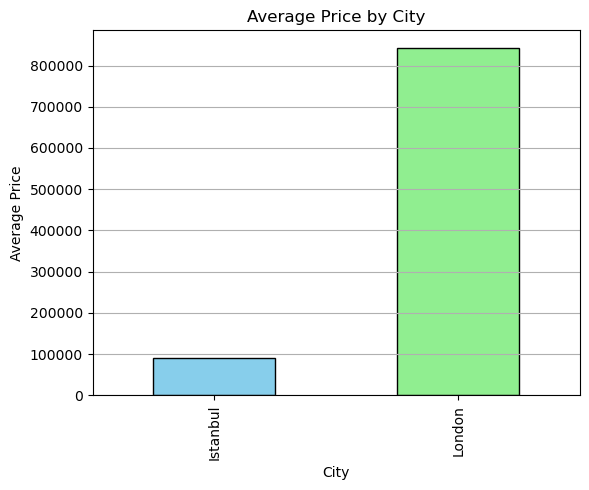

In [31]:
mean_prices = combined_df.groupby('city')['price'].mean()

# Bar plot
plt.figure(figsize=(6, 5))
mean_prices.plot(kind='bar', color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title('Average Price by City')
plt.ylabel('Average Price')
plt.xlabel('City')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


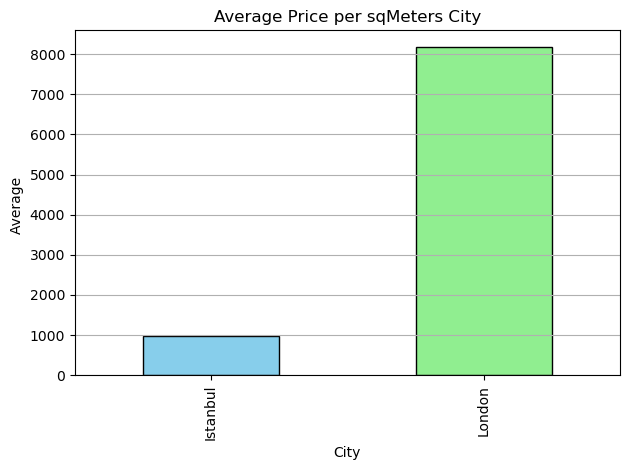

In [32]:
mean_sq = combined_df.groupby('city')['price_per_sq'].mean()

mean_sq.plot(kind='bar', color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title('Average Price per sqMeters City')
plt.ylabel('Average ')
plt.xlabel('City')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


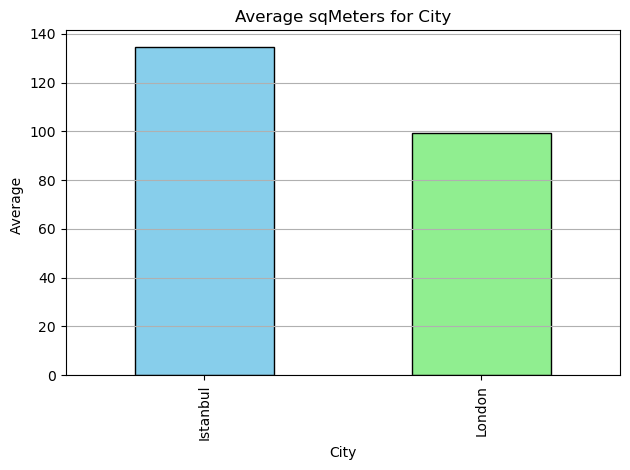

In [33]:
mean_sq = combined_df.groupby('city')['squareMeters'].mean()

mean_sq.plot(kind='bar', color=['skyblue', 'lightgreen'], edgecolor='black')

plt.title('Average sqMeters for City')
plt.ylabel('Average ')
plt.xlabel('City')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

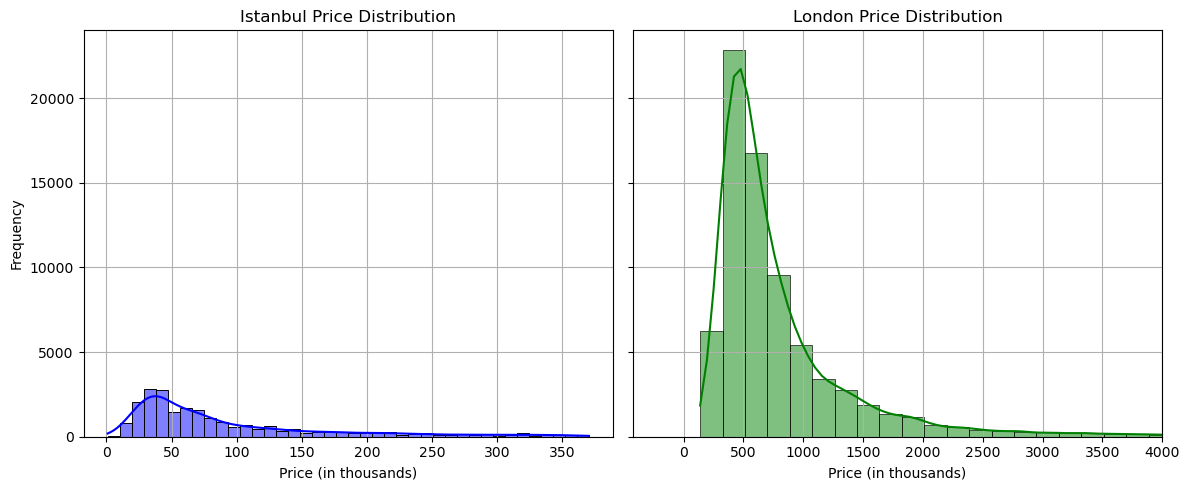

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# İstanbul histogram + KDE
sns.histplot(ist_df['price'] / 1000, bins=40, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Istanbul Price Distribution')
axes[0].set_xlabel('Price (in thousands)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Londra histogram + KDE
sns.histplot(lon_df['price'] / 1000, bins=60, kde=True, color='green', ax=axes[1])
axes[1].set_title('London Price Distribution')
axes[1].set_xlabel('Price (in thousands)')
axes[1].set_xlim(right=4000)
axes[1].grid(True)

plt.tight_layout()
plt.show()


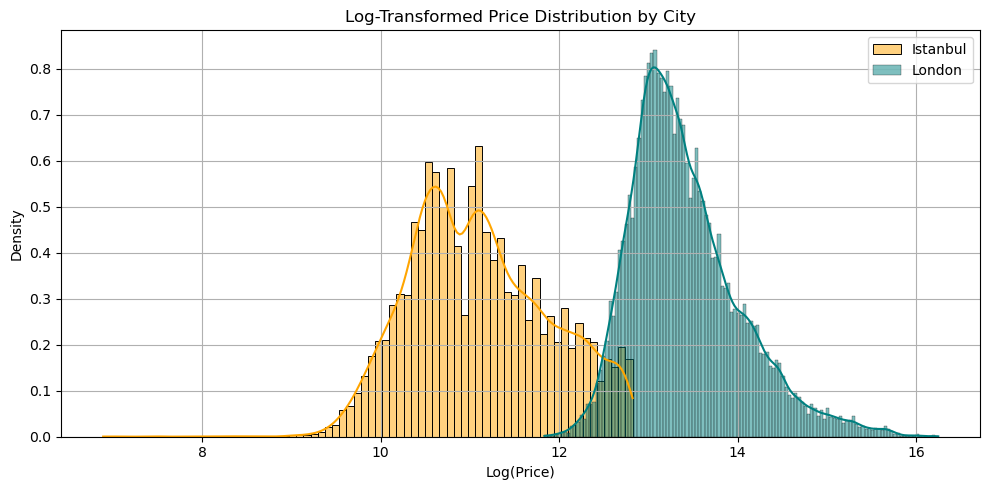

In [35]:
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(combined_df[combined_df['city'] == 'Istanbul']['price']), color='orange', label='Istanbul', kde=True, stat='density')
sns.histplot(np.log1p(combined_df[combined_df['city'] == 'London']['price']), color='teal', label='London', kde=True, stat='density')
plt.title('Log-Transformed Price Distribution by City')
plt.xlabel('Log(Price)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


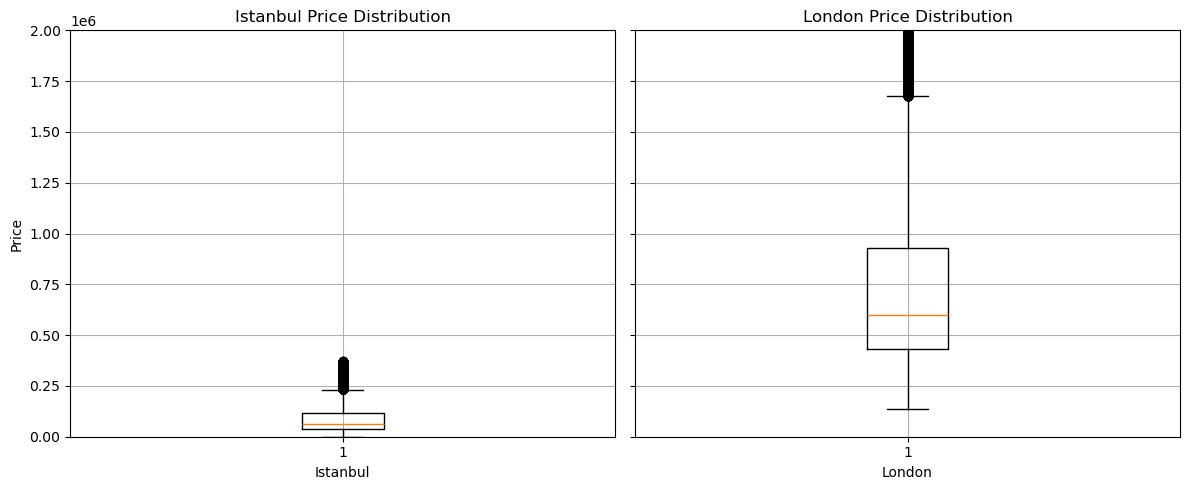

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# İstanbul boxplot
axes[0].boxplot(ist_df['price'].dropna())
axes[0].set_title('Istanbul Price Distribution')
axes[0].set_xlabel('Istanbul')
axes[0].set_ylabel('Price')
axes[0].set_ylim(0, 2000000)
axes[0].grid(True)

# Londra boxplot
axes[1].boxplot(lon_df['price'].dropna())
axes[1].set_title('London Price Distribution')
axes[1].set_xlabel('London')
axes[1].set_ylim(0, 2000000)
axes[1].grid(True)

plt.tight_layout()
plt.show()

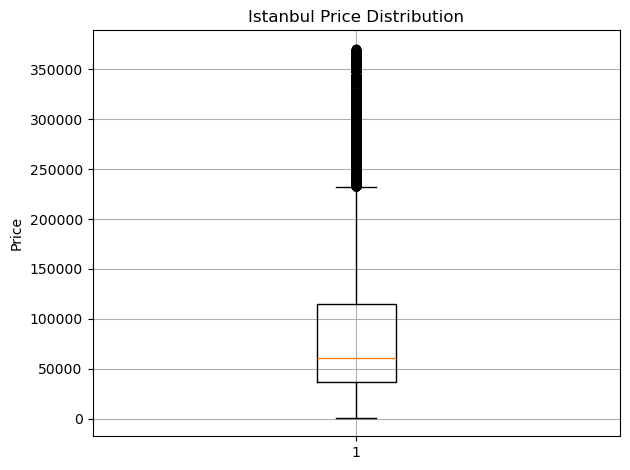

In [37]:
plt.boxplot(ist_df['price'].dropna(),  )

plt.title('Istanbul Price Distribution')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

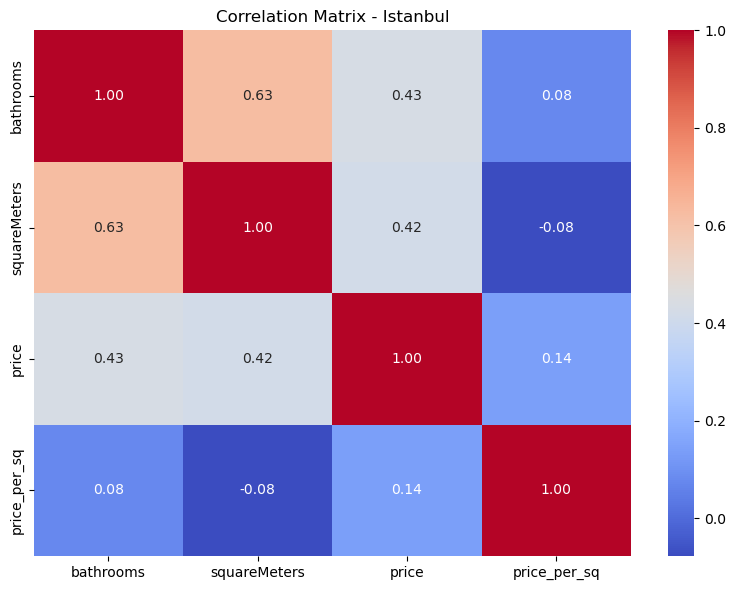

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(ist_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Istanbul')
plt.tight_layout()
plt.show()

There are no significant correlations between price and square meters, or between price and number of bathrooms in the Istanbul dataset.

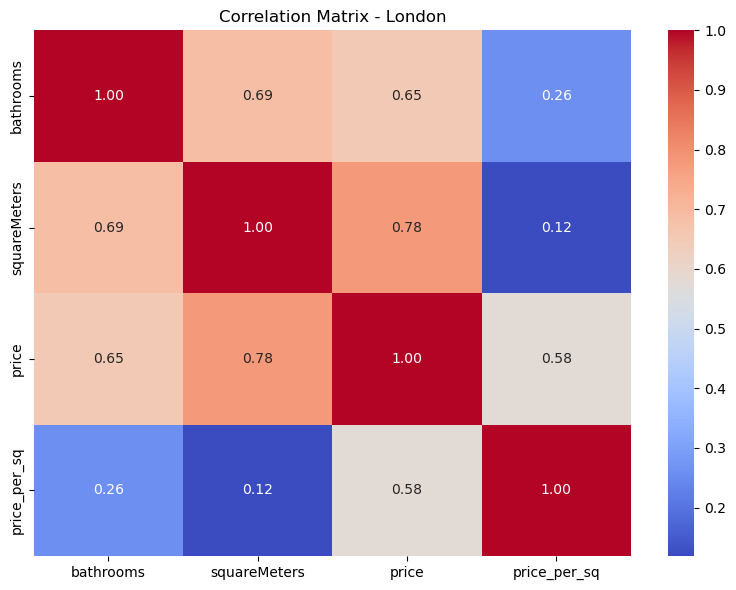

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(lon_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - London')
plt.tight_layout()
plt.show()


There is a strong correlation between price and squareMeters. Also for price and bathrooms but not that much.

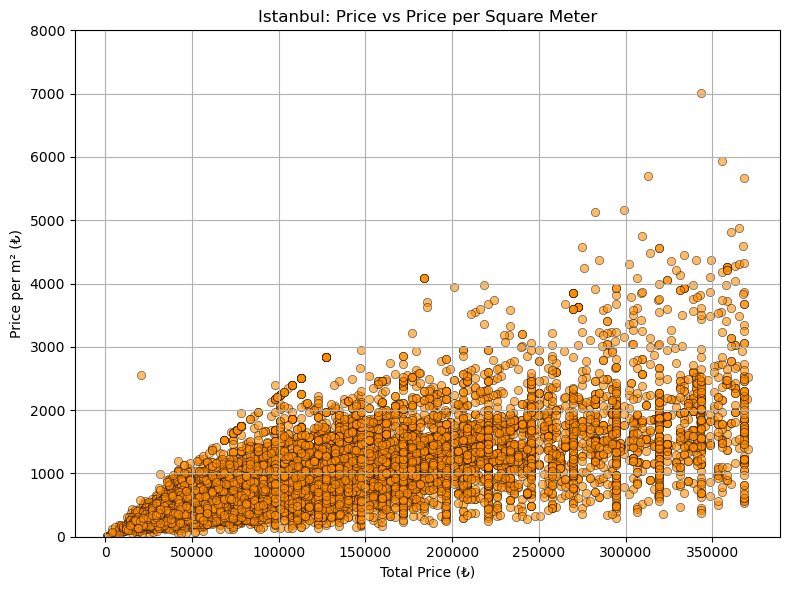

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ist_df, x='price', y='price_per_sq', alpha=0.6, color='darkorange', edgecolor='black')
plt.title('Istanbul: Price vs Price per Square Meter')
plt.xlabel('Total Price (₺)')
plt.ylabel('Price per m² (₺)')
plt.ylim(0,8000)
plt.grid(True)
plt.tight_layout()
plt.show()

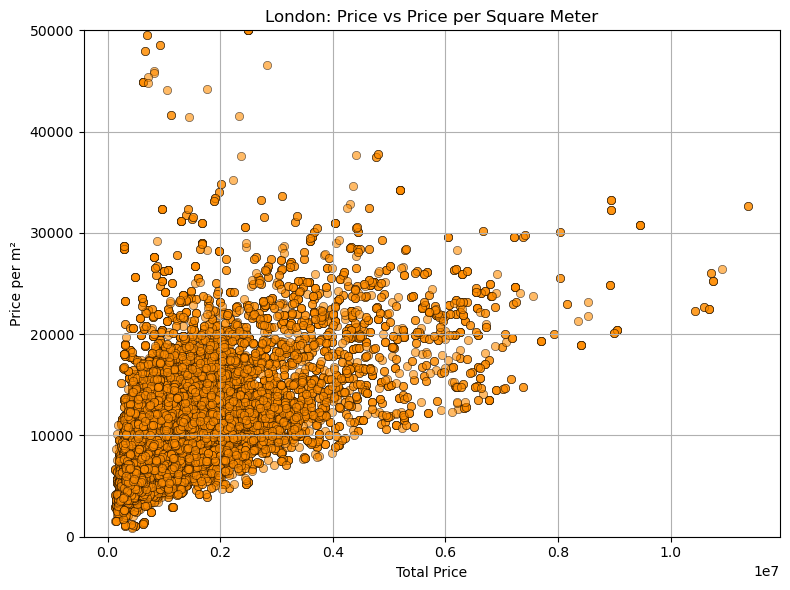

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=lon_df, x='price', y='price_per_sq', alpha=0.6, color='darkorange', edgecolor='black')
plt.title('London: Price vs Price per Square Meter')
plt.xlabel('Total Price')
plt.ylabel('Price per m²')
plt.ylim(0,50000)
plt.grid(True)
plt.tight_layout()
plt.show()

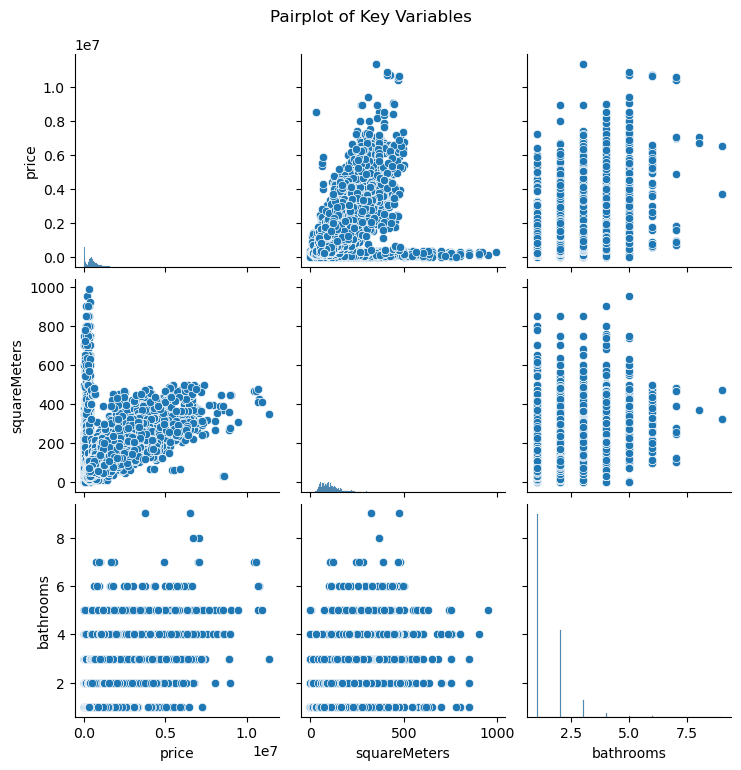

In [42]:
sns.pairplot(combined_df[['price', 'squareMeters', 'bathrooms']], diag_kind='hist')
plt.suptitle("Pairplot of Key Variables", y=1.02)
plt.show()

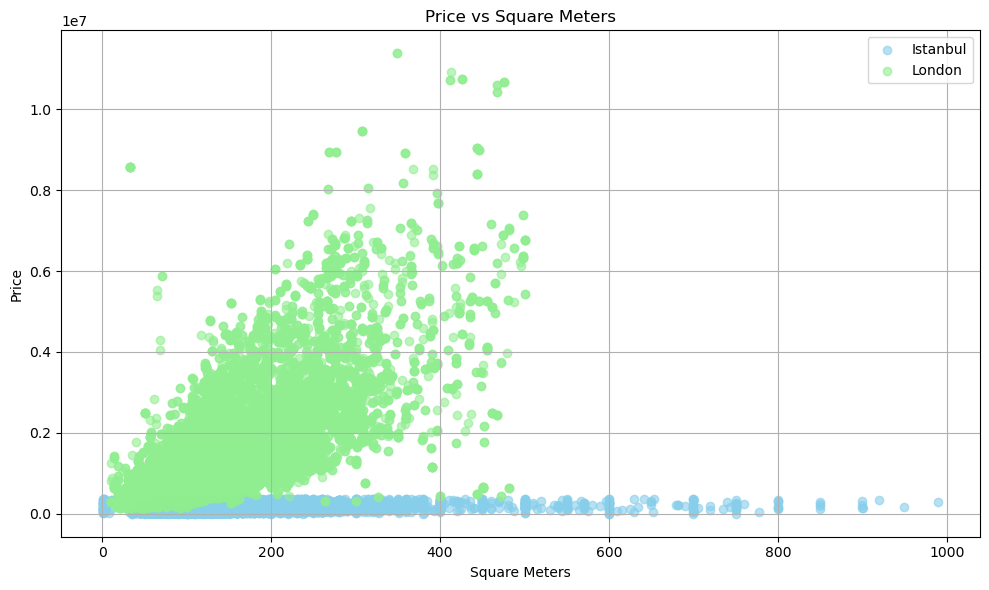

In [43]:
plt.figure(figsize=(10, 6))

# İstanbul
plt.scatter(ist_df['squareMeters'], ist_df['price'], color='skyblue', alpha=0.6, label='Istanbul')

# Londra
plt.scatter(lon_df['squareMeters'], lon_df['price'], color='lightgreen', alpha=0.6, label='London')

plt.title('Price vs Square Meters')
plt.xlabel('Square Meters')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
from scipy.stats import ttest_ind

ist_df['price_per_sq'] = ist_df['price'] / ist_df['squareMeters']
lon_df['price_per_sq'] = lon_df['price'] / lon_df['squareMeters']


ist_prices = ist_df['price_per_sq']
lon_prices = lon_df['price_per_sq']


t_stat, p_val = ttest_ind(ist_prices, lon_prices, equal_var=False)  


print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")


alpha = 0.05
if p_val < alpha:
    print("H0 rejected: Significant difference: The average price per square meter in Istanbul and London is statistically different .")
else:
    print("No significant difference: There is no statistically significant difference in the average price per square meter between Istanbul and London (H0 not rejected).")


T-statistic: -139.741
P-value: 0.0000
H0 rejected: Significant difference: The average price per square meter in Istanbul and London is statistically different .


In [45]:
ist_sq = ist_df['squareMeters']
lon_sq = lon_df['squareMeters']
# T-test
t_stat, p_val = ttest_ind(ist_sq, lon_sq, equal_var=False)

# One sided p-value (H1: İstanbul > Londra)
one_sided_p = p_val / 2

print(f"T-statistic: {t_stat:.3f}")
print(f"One-sided p-value: {one_sided_p:.4f}")

alpha = 0.05
if (t_stat > 0) and (one_sided_p < alpha):
    print("H0 rejected: Houses in Istanbul are significantly larger then London.")
else:
    print("H0 not rejected: We cannot conclude that houses in Istanbul are larger then London.")


T-statistic: 67.223
One-sided p-value: 0.0000
H0 rejected: Houses in Istanbul are significantly larger then London.


In [ ]:
# Checking is there a statistically significant relationship btw price and square meters for İstanbul
ist_prices = ist_df['price']
ist_sqmeters = ist_df['squareMeters']

ist_clean = ist_df[['price', 'squareMeters']]

corr_coef, p_val = pearsonr(ist_clean['price'], ist_clean['squareMeters'])


print(f"Pearson Correlation Coefficient: {corr_coef:.3f}")
print(f"P-value: {p_val:.4f}")


alpha = 0.05
if p_val < alpha:
    print("H0 rejected: There is a statistically significant relationship between price and square meters in İStanbul.")
else:
    print("H0 not rejected: There is no statistically significant relationship between price and square meters in İstanbul.")

Pearson Correlation Coefficient: 0.416
P-value: 0.0000
H0 rejected: There is a statistically significant relationship between price and square meters in İStanbul.


Pearson Correlation Coefficient: 0.777
P-value: 0.0000
H0 rejected: There is a statistically significant relationship between price and square meters in London.


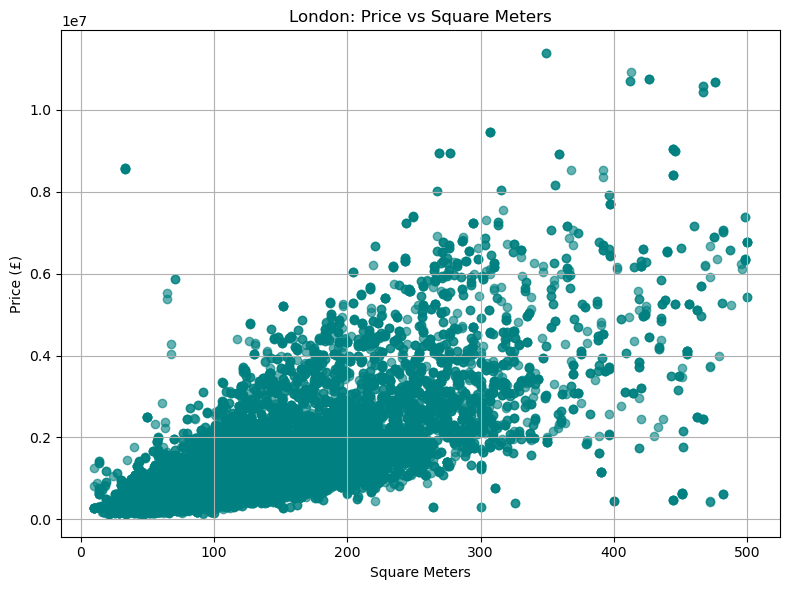

In [ ]:
# Checking is there a statistically significant relationship btw price and square meters in London

lon_clean = lon_df[['price', 'squareMeters']].dropna()


corr_coef, p_val = pearsonr(lon_clean['price'], lon_clean['squareMeters'])


print(f"Pearson Correlation Coefficient: {corr_coef:.3f}")
print(f"P-value: {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("H0 rejected: There is a statistically significant relationship between price and square meters in London.")
else:
    print("H0 could not be rejected: There is no statistically significant relationship between price and square meters in London.")



plt.figure(figsize=(8, 6))
plt.scatter(lon_clean['squareMeters'], lon_clean['price'], alpha=0.6, color='teal')
plt.title('London: Price vs Square Meters')
plt.xlabel('Square Meters')
plt.ylabel('Price (£)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import spearmanr


ist_clean = ist_df[['price_per_sq', 'squareMeters']].dropna()

corr_coef, p_val = spearmanr(ist_clean['squareMeters'], ist_clean['price_per_sq'])


print(f"Spearman Correlation Coefficient: {corr_coef:.3f}")
print(f"P-value: {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("H0 rejected: There is a statistically significant monotonic relationship between square meters and price per square meter in Istanbul.")
else:
    print("H0 could not be rejected: There is no statistically significant monotonic relationship between square meters and price per square meter in Istanbul.")



Spearman Correlation Coefficient: -0.018
P-value: 0.0076
H0 rejected: There is a statistically significant monotonic relationship between square meters and price per square meter in Istanbul.


# ML Part


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [50]:
X_ist = ist_df[['squareMeters', 'bathrooms']].copy()
y_ist = ist_df['price']

X_lon = lon_df[['squareMeters', 'bathrooms']].copy()
y_lon = lon_df['price']

In [51]:

from sklearn.model_selection import cross_val_score

model_ist = RandomForestRegressor(random_state=42)
model_lon = RandomForestRegressor(random_state=42)
cross_ist= cross_val_score(model_ist, X_ist, y_ist, cv=5, scoring='r2')
cross_lon = cross_val_score(model_lon, X_lon, y_lon, cv=5, scoring="r2")

print("İstanbul - Cross-Validated R2 Scores:", cross_ist, "mean: ", cross_ist.mean())
print("London - Cross-Validated R2 Scores:", cross_lon ,"mean: ", cross_lon.mean())


İstanbul - Cross-Validated R2 Scores: [0.27816047 0.13660124 0.15108746 0.21636645 0.22855993] mean:  0.2021551120621104
London - Cross-Validated R2 Scores: [0.74884764 0.76671991 0.72719996 0.69842686 0.67450161] mean:  0.7231391943716103


In [52]:
# lets see parameters effects
from sklearn.model_selection import cross_val_score

model_ist = RandomForestRegressor(n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    max_features='sqrt',
    random_state=42)
model_lon = RandomForestRegressor(n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    max_features='sqrt',
    random_state=42)
cross_ist= cross_val_score(model_ist, X_ist, y_ist, cv=5, scoring='r2')
cross_lon = cross_val_score(model_lon, X_lon, y_lon, cv=5, scoring="r2")

print("İstanbul - Cross-Validated R2 Scores:", cross_ist, "mean: ", cross_ist.mean())
print("London - Cross-Validated R2 Scores:", cross_lon ,"mean: ", cross_lon.mean())

İstanbul - Cross-Validated R2 Scores: [0.30793687 0.18203957 0.16724571 0.21241431 0.21500404] mean:  0.21692809740046376
London - Cross-Validated R2 Scores: [0.67199353 0.6912366  0.66420221 0.67168639 0.65352073] mean:  0.6705278921198755


In [53]:
model_ist = RandomForestRegressor(random_state=42)
model_lon = RandomForestRegressor(random_state=42)
cross_ist= cross_val_score(model_ist, X_ist, y_ist, cv=5, scoring='r2')
cross_lon = cross_val_score(model_lon, X_lon, y_lon, cv=5, scoring="r2")

print("İstanbul - Cross-Validated R2 Scores:", cross_ist, "mean: ", cross_ist.mean())
print("London - Cross-Validated R2 Scores:", cross_lon ,"mean: ", cross_lon.mean())

İstanbul - Cross-Validated R2 Scores: [0.27816047 0.13660124 0.15108746 0.21636645 0.22855993] mean:  0.2021551120621104
London - Cross-Validated R2 Scores: [0.74884764 0.76671991 0.72719996 0.69842686 0.67450161] mean:  0.7231391943716103


In [54]:
# İstanbul
X_train_ist, X_test_ist, y_train_ist, y_test_ist = train_test_split(X_ist, y_ist, test_size=0.2, random_state=42)
model_ist = RandomForestRegressor(random_state=42)
model_ist.fit(X_train_ist, y_train_ist)
preds_ist = model_ist.predict(X_test_ist)



In [55]:
# Londra
X_train_lon, X_test_lon, y_train_lon, y_test_lon = train_test_split(X_lon, y_lon, test_size=0.2, random_state=42)
model_lon = RandomForestRegressor(random_state=42)
model_lon.fit(X_train_lon, y_train_lon)
preds_lon = model_lon.predict(X_test_lon)

In [ ]:
# performance
print("Istanbul R²:", r2_score(y_test_ist, preds_ist))
print("Istanbul RMSE:", mean_squared_error(y_test_ist, preds_ist, squared=False))

print("London R²:", r2_score(y_test_lon, preds_lon))
print("London RMSE:", mean_squared_error(y_test_lon, preds_lon, squared=False))

# feature importance
print("\nIstanbul Feature Importances:")
for feat, val in zip(X_ist.columns, model_ist.feature_importances_):
    print(f"{feat}: {val:.4f}")

print("\nLondon Feature Importances:")
for feat, val in zip(X_lon.columns, model_lon.feature_importances_):
    print(f"{feat}: {val:.4f}")


Istanbul R²: 0.2874941938647446
Istanbul RMSE: 66923.9920294223
London R²: 0.7346068129626748
London RMSE: 406152.37149368046

Istanbul Feature Importances:
squareMeters: 0.8467
bathrooms: 0.1533

London Feature Importances:
squareMeters: 0.9121
bathrooms: 0.0879


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


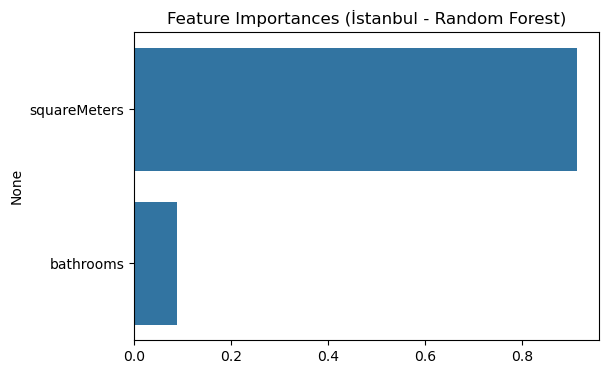

In [62]:
importances = model_lon.feature_importances_
features = X_lon.columns

plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances (İstanbul - Random Forest)")
plt.show()


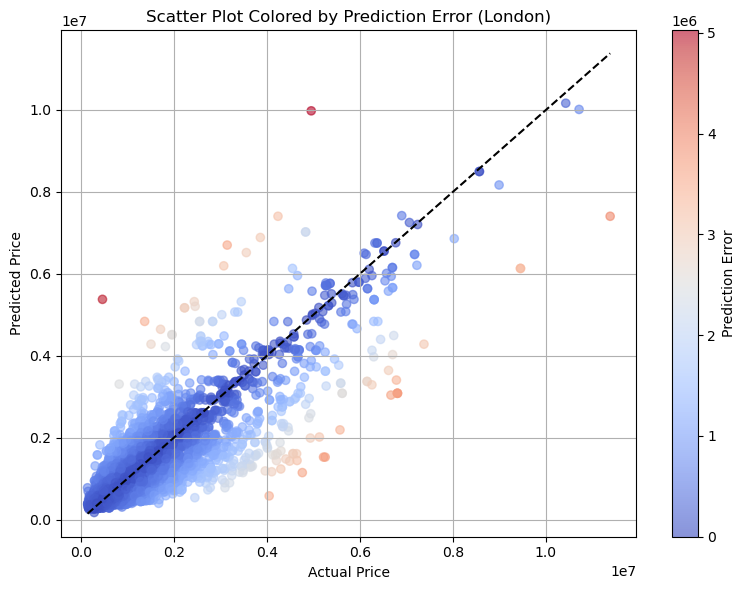

In [63]:
import numpy as np

errors = np.abs(y_test_lon - preds_lon)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_lon, preds_lon, c=errors, cmap='coolwarm', alpha=0.6)
plt.plot([y_test_lon.min(), y_test_lon.max()],
         [y_test_lon.min(), y_test_lon.max()],
         'k--')
plt.colorbar(label='Prediction Error')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Scatter Plot Colored by Prediction Error (London)')
plt.grid(True)
plt.tight_layout()
plt.show()



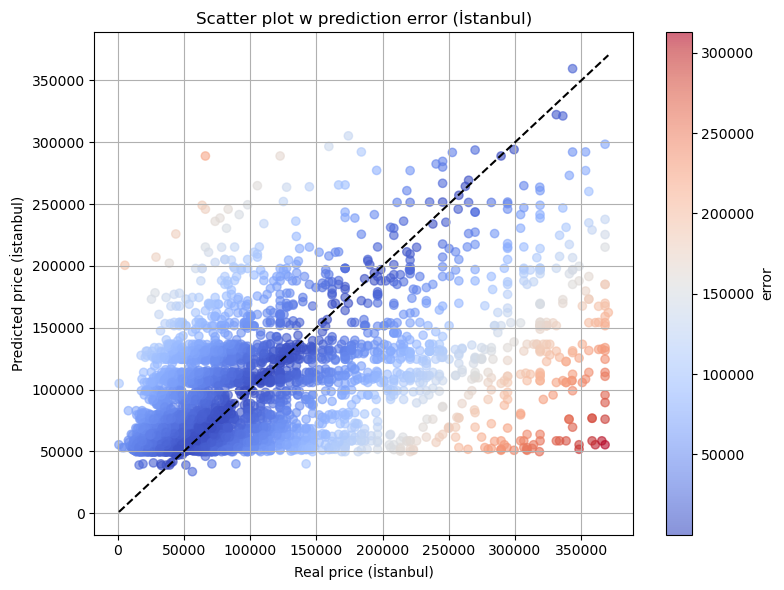

In [64]:
import numpy as np
import matplotlib.pyplot as plt


errors_ist = np.abs(y_test_ist - preds_ist)


plt.figure(figsize=(8, 6))
plt.scatter(y_test_ist, preds_ist, c=errors_ist, cmap='coolwarm', alpha=0.6)
plt.plot([y_test_ist.min(), y_test_ist.max()],
         [y_test_ist.min(), y_test_ist.max()],
         'k--')
plt.colorbar(label='error')
plt.xlabel('Real price (İstanbul)')
plt.ylabel('Predicted price (İstanbul)')
plt.title('Scatter plot w prediction error (İstanbul)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### We see that predictons for Istanbul is not really correct (which may be caused of our features are not enough for prediction). 
#### On the other hand London's are more accurate.

In [65]:
# The codecell below gave an error for NaN value so i dropped them
X_ist = X_ist.dropna()
y_ist = y_ist.loc[X_ist.index] 

X_lon = X_lon.dropna()
y_lon = y_lon.loc[X_lon.index]

In [66]:
#lets try different regression techniques

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

results = []

for city, X, y in [("Istanbul", X_ist, y_ist), ("London", X_lon, y_lon)]:
    for name, model in models.items():
        r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
        
        results.append({
            "City": city,
            "Model": name,
            "R2 Mean": r2_scores.mean(),
        })

cv_df = pd.DataFrame(results)
display(cv_df)


,City,Model,R2 Mean
0,Istanbul,Linear Regression,0.185134
1,Istanbul,Random Forest,0.196348
2,Istanbul,XGBoost,0.207405
3,London,Linear Regression,0.625061
4,London,Random Forest,0.723139
5,London,XGBoost,0.670211
